#  Implementing image style transfer For the paper

In [59]:
import torch 
from torchvision import transforms , models 
from PIL import Image 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
device = ("cuda" if torch.cuda.is_available() else "cpu")

print(matplotlib.__version__)
model = models.vgg19(pretrained=True).features

3.1.2


In [60]:
# here we set it to false because we use it pre trained model, no needs to train
for p in model.parameters():
    p.requires_grad = False
#this is the layers for VGG19 network 
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

In [61]:
#pass the model and the inputs to the function and it iterates over layers
def model_activations(input,model):
    layers = {
    '0' : 'conv1_1',
    '5' : 'conv2_1',
    '10': 'conv3_1',
    '19': 'conv4_1',
    '21': 'conv4_2',
    '28': 'conv5_1'
    }
    features = {}
    x = input
    print(x.ndim)
    x = x.unsqueeze(0)
    print(x.ndim)
    #https://stackoverflow.com/questions/57237352/what-does-unsqueeze-do-in-pytorch
    for name,layer in model._modules.items():
        #for each layer, calculate the result(feature map) 
        x = layer(x)
        #if this layer name is founded, just store it
        if name in layers:
            features[layers[name]] = x 
    
    return features



In [62]:
# resize image to 300 by 300 and conver it to transform and normlize it
transform = transforms.Compose([transforms.Resize(300),
                              transforms.ToTensor(),
                              transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

In [63]:
# this is the images that we want to manipulate. We conver it 
content = Image.open("content.jpg").convert("RGB")
content = transform(content).to(device)
print("COntent shape => ", content.shape)
style = Image.open("style.jpg").convert("RGB")
style = transform(style).to(device)

COntent shape =>  torch.Size([3, 300, 307])


In [64]:
# this function take the image and conver the transformer to form that is print it by mateploit
def imcnvt(image):
    x = image.to("cpu").clone().detach().numpy().squeeze()
    x = x.transpose(1,2,0)
    x = x*np.array((0.5,0.5,0.5)) + np.array((0.5,0.5,0.5))
    return x

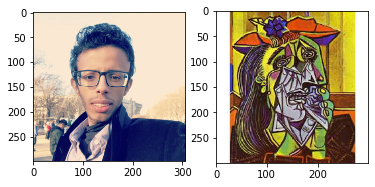

In [65]:
fig, (ax1,ax2) = plt.subplots(1,2)

ax1.imshow(imcnvt(content),label = "Content")
ax2.imshow(imcnvt(style),label = "Style")
plt.show()


In [66]:
# see my presentation (I talked about Gram matrix): calculste the correlation between two features in each layer for extract style
def gram_matrix(imgfeature):
    _,d,h,w = imgfeature.size()
    imgfeature = imgfeature.view(d,h*w)
    gram_mat = torch.mm(imgfeature,imgfeature.t())
    
    return gram_mat


In [67]:
# target image which we combine the content and style. we clone content size because we want them to be the same
target = content.clone().requires_grad_(True).to(device)

In [68]:
#set device to cuda if available
print("device = ",device)

# extract features from two images. One for content and the other for style
style_features = model_activations(style,model)
content_features = model_activations(content,model)


device =  cpu
3
4
3
4


In [69]:
# the more weight, the more style for certain layer as spesfied. lower layers has more style so that is why is more weigh (logic
# also, higher layer capture content (see the presentation))
# play with it to see how it affect the image
style_wt_meas = {"conv1_1" : 1.0, 
                 "conv2_1" : 0.8,
                 "conv3_1" : 0.4,
                 "conv4_1" : 0.2,
                 "conv5_1" : 0.1}


In [70]:
# the style gram matrix after calculated
style_grams = {layer:gram_matrix(style_features[layer]) for layer in style_features}

In [71]:
# this is the hyperparmeter in last quation. (to play between how much content and style we want in the image)
content_wt = 100
style_wt = 1e8

In [72]:
print_after = 500
epochs = 3000
optimizer = torch.optim.Adam([target],lr=0.007)

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  10   tensor(3.7037e+18, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  20   tensor(2.1180e+18, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  30   tensor(1.2112e+18, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  40   tensor(7.7023e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  50   tensor(5.7098e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  60   tensor(4.6442e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  70   tensor(4.0153e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  80   tensor(3.5827e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  90   tensor(3.2509e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  100   tensor(2.9797e+17, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  11

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


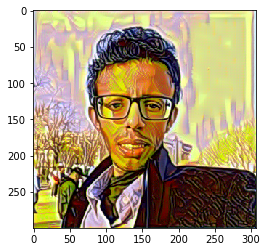

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  510   tensor(3.4194e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  520   tensor(3.2777e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  530   tensor(3.1460e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  540   tensor(3.0234e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  550   tensor(2.9092e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  560   tensor(2.8030e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  570   tensor(2.7041e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  580   tensor(2.6119e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  590   tensor(2.5259e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  600   tensor(2.4455e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


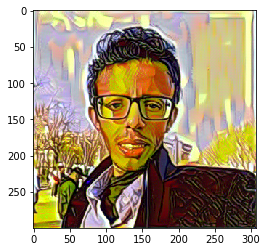

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1010   tensor(1.1101e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1020   tensor(1.0961e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1030   tensor(1.0824e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1040   tensor(1.0691e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1050   tensor(1.0561e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1060   tensor(1.0433e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1070   tensor(1.0309e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1080   tensor(1.0187e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1090   tensor(1.0068e+16, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1100   tensor(9.9510e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


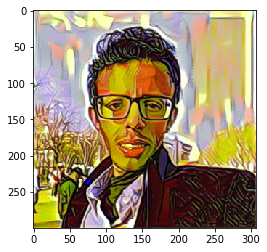

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1510   tensor(6.6300e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1520   tensor(6.5726e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1530   tensor(6.5160e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1540   tensor(6.4602e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1550   tensor(6.4051e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1560   tensor(6.3508e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1570   tensor(6.2972e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1580   tensor(6.2442e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1590   tensor(6.1920e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  1600   tensor(6.1404e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


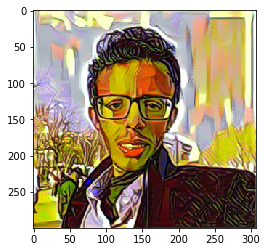

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2010   tensor(4.4566e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2020   tensor(4.4242e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2030   tensor(4.3920e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2040   tensor(4.3602e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2050   tensor(4.3287e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2060   tensor(4.2974e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2070   tensor(4.2664e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2080   tensor(4.2357e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2090   tensor(4.2054e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2100   tensor(4.1754e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


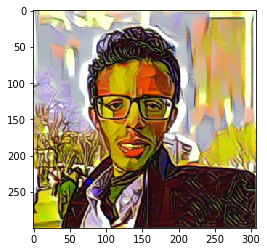

3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2510   tensor(3.1463e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2520   tensor(3.1246e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2530   tensor(3.1031e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2540   tensor(3.0818e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2550   tensor(3.0605e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2560   tensor(3.0395e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2570   tensor(3.0186e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2580   tensor(2.9980e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2590   tensor(2.9775e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3
4
epoch  2600   tensor(2.9572e+15, grad_fn=<AddBackward0>)
3
4
3
4
3
4
3
4
3
4
3
4
3
4
3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


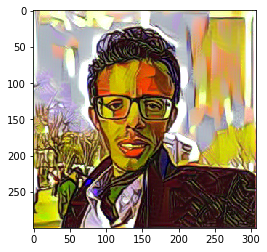

In [73]:

for i in range(1,epochs+1):
    target_features = model_activations(target,model)
    # this is just the square error for content loss 
    content_loss = torch.mean((content_features['conv4_2']-target_features['conv4_2'])**2)

    style_loss = 0
    for layer in style_wt_meas:
        style_gram = style_grams[layer]
        target_gram = target_features[layer]
        _,d,w,h = target_gram.shape
        # we already calculate the style gram matrix, but now calculate that for target
        target_gram = gram_matrix(target_gram)

        # this just style loss (see the equation in the paper) and d*w*h is just normallizing part
        style_loss += (style_wt_meas[layer]*torch.mean((target_gram-style_gram)**2))/d*w*h
        
        
    # total loss for both content and style plus the hyperparamter
    total_loss = content_wt*content_loss + style_wt*style_loss 
    
    #print the loss after each 10 iteration
    if i%10==0:       
        print("epoch ",i," ", total_loss)
    
    # see his videos about that Pytrouch 
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
    
    #after 100 iteration print the image and save it to folder 
    if i%print_after == 0:
        plt.imshow(imcnvt(target),label="Epoch "+str(i))
        plt.show()
        #plt.imsave(str(i)+'.png',imcnvt(target),format='png')
        #plt.imshow(image_new)






